# RVRT - Recurrent Video Restoration Transformer

VRT ahcieves state-of-the-art performance with balanced model size, testing memory, and runtime in
VRT обеспечивает state-of-the-art производительность для задач SR, deblurring, denoising на различных датасетах:
- video SR (REDS, Vimeo90K, Vid4 and UDM10)
- video deblurring (GoPro, DVD and REDS)
- video denoising (DAVIS and Set8)

<img src="https://raw.githubusercontent.com/JingyunLiang/RVRT/main/assets/vsr_visual.jpg" width="70%">



## 1. Подготовка 
Перед стартом настраиваем окружение
* Python 3
* GPU
* Браузер != Firefox

Далее, клонируем репозиторий, устанавливаем окружение, скачиваем пред-обученную модель.

In [1]:
!rm -r RVRT
# Клонируем RVRT
!git clone https://github.com/JingyunLiang/RVRT.git
%cd RVRT
!pip install -r requirements.txt

rm: cannot remove 'RVRT': No such file or directory
Cloning into 'RVRT'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 48 (delta 5), reused 47 (delta 4), pack-reused 0
Receiving objects: 100% (48/48), 2.87 MiB | 1009.00 KiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/RVRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.3 MB/s eta 0:00:00


## 2. Загрузка изображений

Загрузите изображения для обработки RVRT

In [2]:
import os
import glob
from google.colab import files
import shutil
input_folder = None

# загрузка изоборажений
!rm -r testsets/*
!rm -r results/*
os.mkdir('testsets/uploaded')
os.mkdir('testsets/uploaded/testRUTUBE')
os.mkdir('testsets/uploaded/testRUTUBE/000')

uploaded = files.upload()
for filename in uploaded.keys():
  is_image = (filename.split('.')[-1].lower() in ['png','jpeg','jpg','tiff','bmp','tif',])
  input_folder = 'testsets/uploaded/testRUTUBE/000' if is_image else 'testsets/uploaded/testRUTUBE'
  dst_path = os.path.join(input_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

  if not is_image: # изображение или видео
    print(f'extracting the video as frames to {input_folder}/000')
    os.system(f'ffmpeg -i testsets/uploaded/testRUTUBE/{filename} -qscale:v 1 -qmin 1 -qmax 1 -vsync 0  {input_folder}/000/frame%08d.png')
    os.remove(f'testsets/uploaded/testRUTUBE/{filename}')

!ls testsets/uploaded/testRUTUBE/000

 Note1: You can upload a single video/ video frames as a batch. 
 Note2: If you just to want to replicate the results in the paper, you can skip this step (we have enabled automatic download in the code).
 Note3: You may need Chrome to enable file uploading!
 Note4: Our model is trained on simple synthetic videos (e.g., bicubic). It may not perform well on real-world videos.

rm: cannot remove 'results/*': No such file or directory


Saving 0_144.mp4 to 0_144.mp4
move 0_144.mp4 to testsets/uploaded/testRUTUBE/0_144.mp4
extracting the video as frames to testsets/uploaded/testRUTUBE/000
ls: cannot access 'testsets/uploaded/000': No such file or directory


Загрузка изоборажений GroundTruth

In [ ]:
input_folder = None

# загрузка изоборажений 
!rm -r testsets/uploaded/GT
os.mkdir('testsets/uploaded/GT')
os.mkdir('testsets/uploaded/GT/000')

uploaded = files.upload()
for filename in uploaded.keys():
  is_image = (filename.split('.')[-1].lower() in ['png','jpeg','jpg','tiff','bmp','tif',])
  input_folder = 'testsets/uploaded/GT/000' if is_image else 'testsets/uploaded/GT'
  dst_path = os.path.join(input_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

  if not is_image: # изображение или видео
    print(f'extracting the video as frames to {input_folder}/000')
    os.system(f'ffmpeg -i testsets/uploaded/GT/{filename} -qscale:v 1 -qmin 1 -qmax 1 -vsync 0  {input_folder}/000/frame%08d.png')
    os.remove(f'testsets/uploaded/GT/{filename}')

!ls testsets/uploaded/GT

## 3. Inference


In [3]:
# Вводим аргументы для валидации на предобученной модели

!python main_test_rvrt.py --task 001_RVRT_videosr_bi_REDS_30frames --folder_lq testsets/uploaded/testRUTUBE --tile 0 128 128 --tile_overlap 2 20 20 --num_workers 2 --save_result
#--folder_gt testsets/uploaded/GT

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
downloading model model_zoo/rvrt/001_RVRT_videosr_bi_REDS_30frames.pth
using dataset from testsets/uploaded/testRUTUBE
^C


## 4. Визуализация

 Note: Due to Colab GPU memory limitation, we use smaller --tile here, which may lead to different performance from the paper. 
 Please refer to https://github.com/JingyunLiang/RVRT#quick-testing for official arguments.



IndexError: ignored

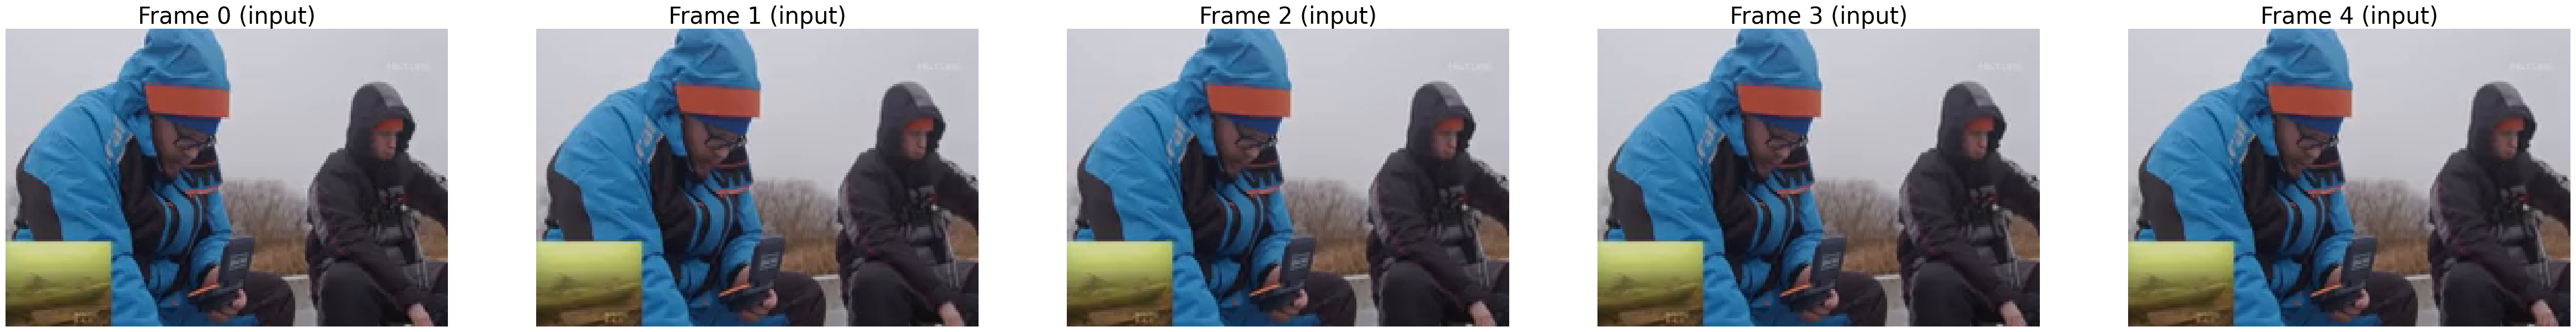

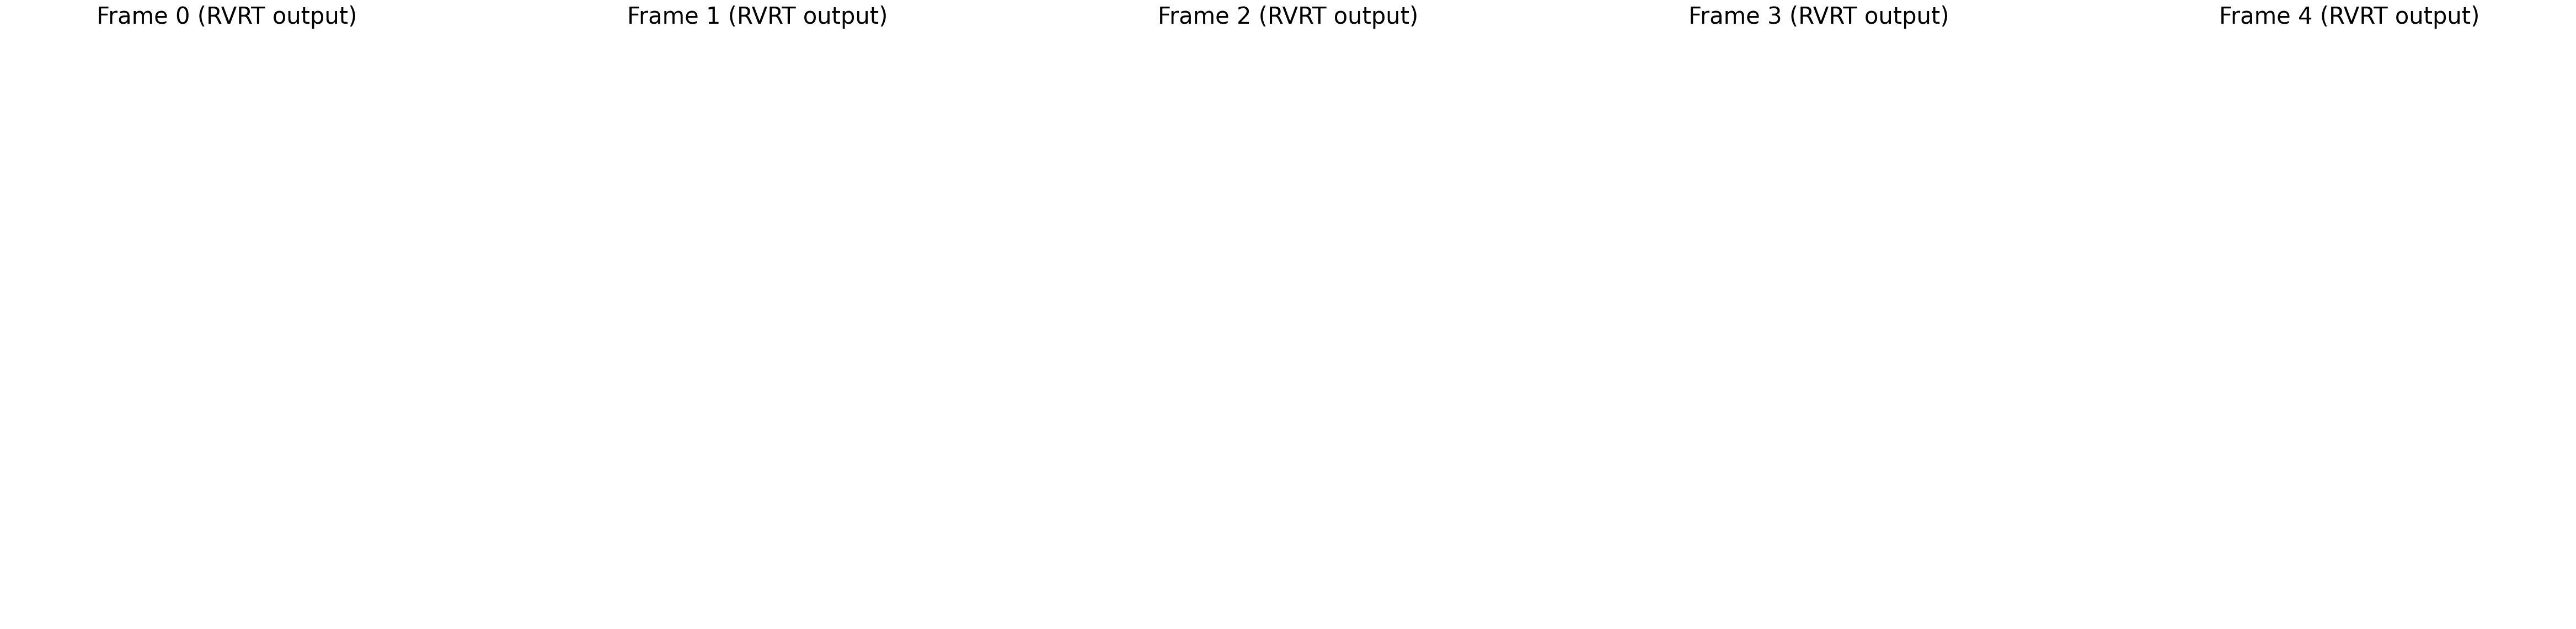

In [4]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

def display(img1, name='input'):
  total_figs = 5
  fig = plt.figure(figsize=(total_figs*12, 14))
  ax1 = fig.add_subplot(1, total_figs, 1)
  plt.title(f'Frame 0 ({name})', fontsize=30)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, total_figs, 2)
  plt.title(f'Frame 1 ({name})', fontsize=30)
  ax2.axis('off')
  ax3 = fig.add_subplot(1, total_figs, 3)
  plt.title(f'Frame 2 ({name})', fontsize=30)
  ax3.axis('off')
  ax4 = fig.add_subplot(1, total_figs, 4)
  plt.title(f'Frame 3 ({name})', fontsize=30)
  ax4.axis('off')
  ax5 = fig.add_subplot(1, total_figs, 5)
  plt.title(f'Frame 4 ({name})', fontsize=30)
  ax5.axis('off')
  ax1.imshow(img1[0])
  ax2.imshow(img1[1])
  ax3.imshow(img1[2])
  ax4.imshow(img1[3])
  ax5.imshow(img1[4])

# display video by frames
print(' Note: Due to Colab GPU memory limitation, we use smaller --tile here, which may lead to different performance from the paper. \n Please refer to https://github.com/JingyunLiang/RVRT#quick-testing for official arguments.\n')

img = []
for path in sorted(Path('testsets').rglob('*.png'))[:10]:
  img.append(cv2.cvtColor(cv2.imread(f'{path}'), cv2.COLOR_BGR2RGB))
display(img, 'input')
img = []
for path in sorted(Path('results').rglob('*.png'))[:10]:
  img.append(cv2.cvtColor(cv2.imread(f'{path}'), cv2.COLOR_BGR2RGB))
display(img, 'RVRT output')

## 5. Скачиваем результаты

In [ ]:
from google.colab import files
!tar -czf RVRT_result.zip results/*
files.download('RVRT_result.zip')